In [1]:
import data_loader
import pandas
import matplotlib.pyplot as plt

suj_data_loader = data_loader.StartUpJobsDataLoader()
skill_column_flat = suj_data_loader.load_skills_data()

skill_column_expanded = skill_column_flat["level"].apply(pandas.Series)
skill_column_flat_merged = skill_column_flat.merge(right=skill_column_expanded, left_index=True, right_index=True)
skill_column_flat_merged = skill_column_flat_merged.drop(columns=["level"])
skill_column_flat_merged = skill_column_flat_merged.dropna()
skill_column_flat_merged = skill_column_flat_merged.explode("skills")
print(skill_column_flat_merged.head())


       skills  technologies  \
1  JavaScript  [JavaScript]   
1        HTML  [JavaScript]   
1         CSS  [JavaScript]   
1    React JS  [JavaScript]   
1  TypeScript  [JavaScript]   

                                            benefits  junior  medior  senior  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  


In [2]:
skill_column_flat_merged_grouped = pandas.DataFrame(skill_column_flat_merged.groupby("skills").sum())
skill_column_flat_merged_grouped["total"] = skill_column_flat_merged_grouped["junior"] + \
                                            skill_column_flat_merged_grouped["medior"] + \
                                            skill_column_flat_merged_grouped["senior"]
skill_column_flat_merged_grouped_top = skill_column_flat_merged_grouped.sort_values(by="total", ascending=False).iloc[:20]

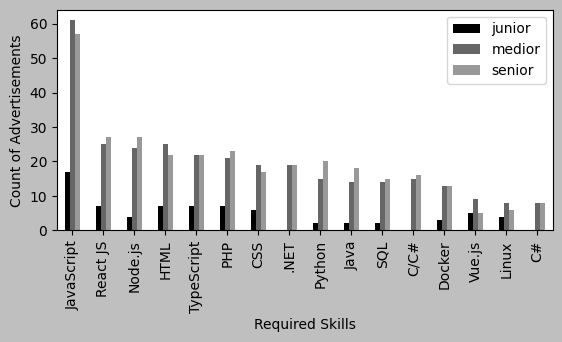

In [43]:
skill_column_flat_merged_grouped_top_tech = skill_column_flat_merged_grouped_top.reset_index(drop=False)
skill_column_flat_merged_grouped_top_tech = skill_column_flat_merged_grouped_top_tech[~skill_column_flat_merged_grouped_top_tech["skills"].isin(["Git", "Project Management", "Communication Skills", "Online Marketing"])]
skill_column_flat_merged_grouped_top_tech = skill_column_flat_merged_grouped_top_tech.set_index("skills")

ax = skill_column_flat_merged_grouped_top_tech[["junior", "medior", "senior"]].plot(kind="bar")
ax.set_xlabel('Required Skills')
ax.set_ylabel('Count of Advertisements')
ax.set_aspect(1/9)
plt.savefig('foo.png', bbox_inches='tight')

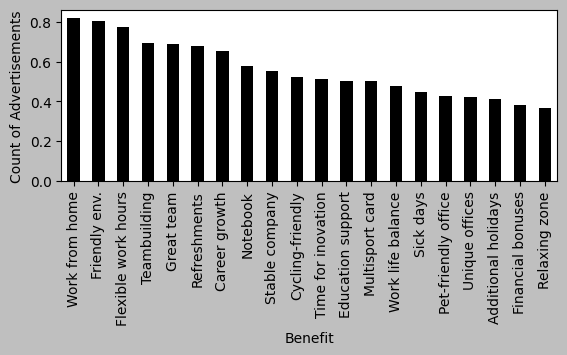

In [44]:
benefits_column = skill_column_flat.explode("benefits")
benefits_column = benefits_column.replace({"Homeoffice": "Work from home", "Přátelské prostředí": "Friendly env.", "Pružná pracovní doba": "Flexible work hours", "Skvělý tým profesionálů": "Great team",
                                           "Kariérní růst": "Career growth", "Stabilní firma": "Stable company", "Občerstvení na pracovišti": "Refreshments", "Cyklisté vítáni": "Cycling-friendly",
                                           "Čas na inovace": "Time for inovation", "Vzdělávací kurzy": "Education support", "Multisport karta": "Multisport card", "Originální kanceláře": "Unique offices",
                                           "Dovolená navíc": "Additional holidays", "Finanční bonusy": "Financial bonuses", "Relaxační zóna": "Relaxing zone"})
benefits_column = pandas.DataFrame(benefits_column.groupby("benefits").size())
benefits_column[0] = benefits_column[0] / skill_column_flat.shape[0]
benefits_column = benefits_column.sort_values(by=0, ascending=False).head(20)
ax = benefits_column.plot(kind="bar")
ax.set_xlabel('Benefit')
ax.set_ylabel('Count of Advertisements')
ax.set_aspect(8)
ax.get_legend().remove()
plt.savefig('foo2.png', bbox_inches='tight')
